<a href="https://colab.research.google.com/github/Bipasha1005/AICTE_Internship/blob/main/Human_Pose_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This package provides additional functionality and modules for OpenCV, including advanced computer vision and image processing algorithms
!pip install opencv-contrib-python

In [2]:
## It provides pre-built solutions for real-time face detection, pose estimation, hand tracking, object detection, and more.
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.0 MB/s eta 0:00:00


In [3]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [4]:
## Initializing mediapipe pose class
mp_pose = mp.solutions.pose

## Setting up the pose function
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

## Initializing mediapipe drawing class, useful for annotation
mp_drawing = mp.solutions.drawing_utils

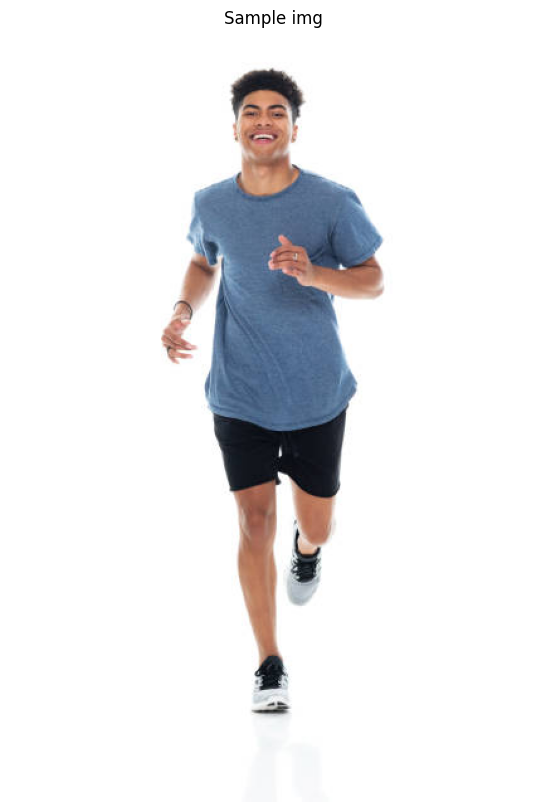

In [5]:
## reading an image from the specific path
sample_img = cv2.imread('sample_img.jpg')

## Specifying the size of the figures
plt.figure(figsize = [10, 10])

## displaying the sample img, also convert BGR to RGB for display
plt.title("Sample img");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [6]:
## performing pose detection after converting the img into rgb format
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

## checking if any landmarks are found
if results.pose_landmarks:
  ## iterating two two times as we only want to display first two landmarks
  for i in range(33):
    ## displaying the found normalized landmarks
    print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.484469652
y: 0.123485737
z: -0.679534376
visibility: 0.999852419

LEFT_EYE_INNER:
x: 0.503310084
y: 0.107664436
z: -0.641292691
visibility: 0.99970144

LEFT_EYE:
x: 0.511132777
y: 0.10818591
z: -0.641968191
visibility: 0.999661446

LEFT_EYE_OUTER:
x: 0.52022028
y: 0.10913834
z: -0.641948164
visibility: 0.999725044

RIGHT_EYE_INNER:
x: 0.47092253
y: 0.108827569
z: -0.631769419
visibility: 0.999830246

RIGHT_EYE:
x: 0.46228838
y: 0.109225333
z: -0.632421672
visibility: 0.999856353

RIGHT_EYE_OUTER:
x: 0.453329414
y: 0.110304475
z: -0.63278389
visibility: 0.999887824

LEFT_EAR:
x: 0.532996476
y: 0.118758678
z: -0.381447703
visibility: 0.999891877

RIGHT_EAR:
x: 0.444164306
y: 0.119385041
z: -0.340216428
visibility: 0.999790967

MOUTH_LEFT:
x: 0.501660764
y: 0.141224772
z: -0.575586796
visibility: 0.999967

MOUTH_RIGHT:
x: 0.467933208
y: 0.140226305
z: -0.568674862
visibility: 0.999969363

LEFT_SHOULDER:
x: 0.620578
y: 0.221097142
z: -0.263172776
visibility: 0.999986887

RIGHT_S

In [7]:
## Now converting the two normalized landmarks displayed above into their original scale by using the width and height of the image.

## Retrieving the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Checking if any Landmarks are found.
if results.pose_landmarks:
  ## Iterating two times as we only want to display first two Landmark.
  for i in range(33):
    ## Displaying the found Landmarks after converting them into their original scale.
    print (f'{mp_pose.PoseLandmark(i).name}:')
    print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
    print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
    print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
    print (f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 202.5083146095276
y: 75.57327076792717
z: -284.0453690290451
visibility: 0.9998524188995361

LEFT_EYE_INNER:
x: 210.38361525535583
y: 65.89063489437103
z: -268.0603449344635
visibility: 0.9997014403343201

LEFT_EYE:
x: 213.6535006761551
y: 66.20977672934532
z: -268.3427037000656
visibility: 0.9996614456176758

LEFT_EYE_OUTER:
x: 217.45207691192627
y: 66.79266393184662
z: -268.3343323469162
visibility: 0.9997250437736511

RIGHT_EYE_INNER:
x: 196.8456174135208
y: 66.6024719774723
z: -264.079617023468
visibility: 0.9998302459716797

RIGHT_EYE:
x: 193.2365427017212
y: 66.84590363502502
z: -264.35225903987885
visibility: 0.9998563528060913

RIGHT_EYE_OUTER:
x: 189.4916951060295
y: 67.506338596344
z: -264.50366592407227
visibility: 0.9998878240585327

LEFT_EAR:
x: 222.79252684116364
y: 72.68031120300293
z: -159.4451397061348
visibility: 0.9998918771743774

RIGHT_EAR:
x: 185.66067987680435
y: 73.06364527344704
z: -142.2104669213295
visibility: 0.9997909665107727

MOUTH_LEFT:
x: 209.6

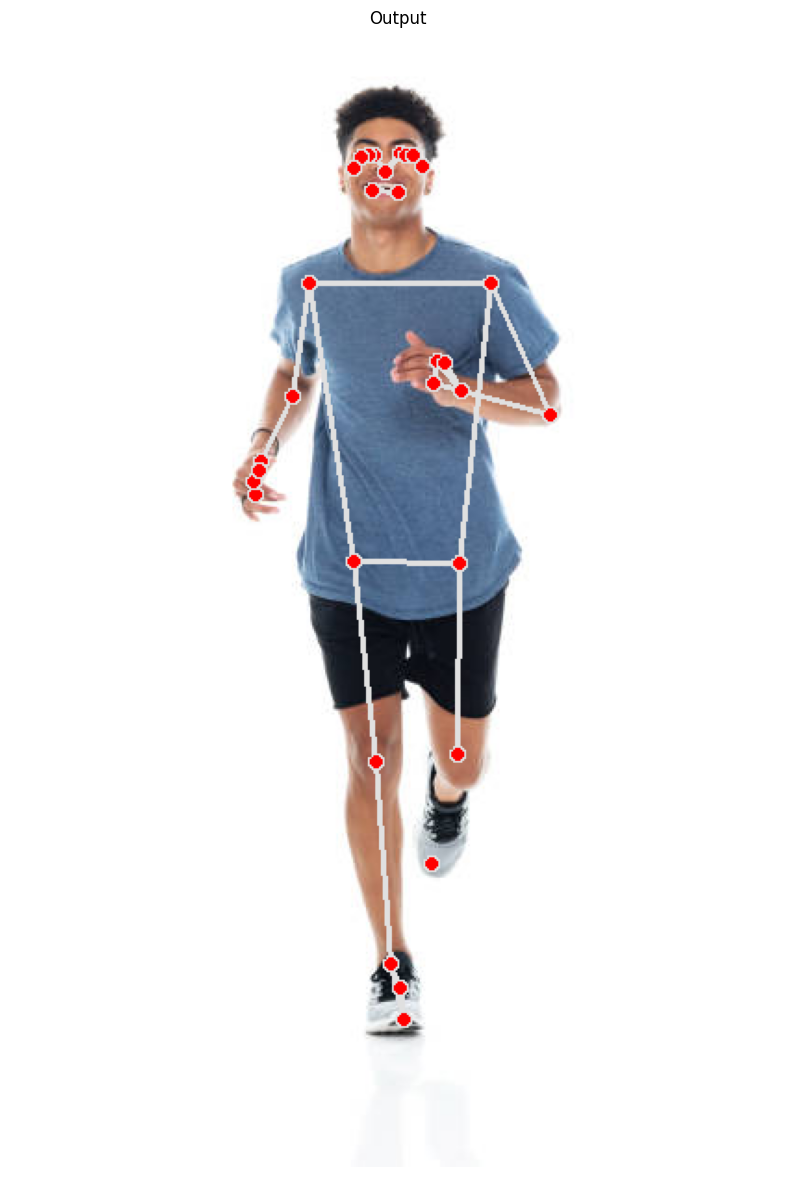

In [8]:
## Now drawing the detected landmarks on the sample image using the function mp.solutions.drawing_utils.draw_landmarks() and display the resultant image using the matplotlib library.

## Creating a copy of the sample image to draw Landmarks on.
img_copy = sample_img.copy()

## Checking if any Landmarks are found.
if results.pose_landmarks:
  ## Drawing Pose Landmarks on the sample image.
  mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)             ##can be done by opencv but that will requre more line of codes

  ## Specifying a size of the figure.
  fig = plt.figure(figsize = [10, 18])

  ## Displaying the output image with the Landmarks drawn, also convert BGR to RGB for display.
  plt.title("Output"); plt.axis('off'); plt.imshow(img_copy[:,:,::-1]);plt.show()

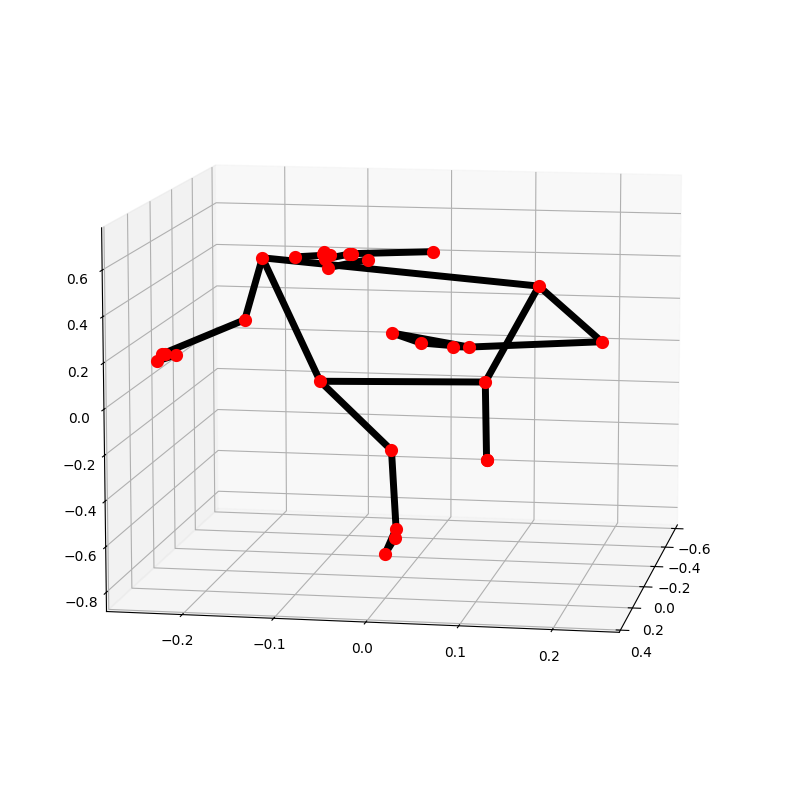

In [9]:
## Plot pose landmarks in 3D
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [10]:
## Create a Pose Detection Function
## Now putting all this together to create a function that will perform pose detection on an image and will visualize the results or return the results depending upon the passed arguments.
def detectPose(image, pose, display=True):
  '''
  This function performs pose detection on an image.
  Args:
    Image: The Input image with a prominent person whose pose landmarks needs to be detected.
    pose: The pose setup function required to perform the pose detection.
    display: A boolean value that is if set to true the function displays the original input image, the resultant image, and the pose landmarks in 3D plot and returns nothing.
  Returns:
    output image: The input image with the detected pose landmarks drawn.
    landmarks: A list of detected landinarks converted into their original scale.
  '''

  ## Creating a copy of the input image.
  output_image = image.copy()

  ## Converting the image from BGR into RGB format.
  imageRGB= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  ## Performing the Pose Detection.
  results = pose.process(imageRGB)

  ## Retrieving the height and width of the input image.
  height, width, _ = image.shape

  ## Initializing a list to store the detected Landmarks.
  landmarks = []

  ## Checking if any Landmarks are detected.
  if results.pose_landmarks:
    ## Drawing Pose Landmarks on the output image.
    mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    ## Iterating over the detected Landmarks.
    for landmark in results.pose_landmarks.landmark:
      ## Append the Lundmark into the list.
      landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))
  ## Checking if the original input image and the resultant image are specified to he displayed.
  if display:
    ## Displaying the original input image and the resultant image.
    plt.figure(figsize=[22,22])
    plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title("Original Image"); plt.axis('off');
    plt.subplot(122); plt.imshow(output_image[:,:,::-1]); plt.title("Output Image"); plt.axis('off');

    ## Plot the Pose Landmarks in 30.
    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

  ## Otherwise
  else:
    ##Return the output image and the found landmarks.
    return output_image, landmarks

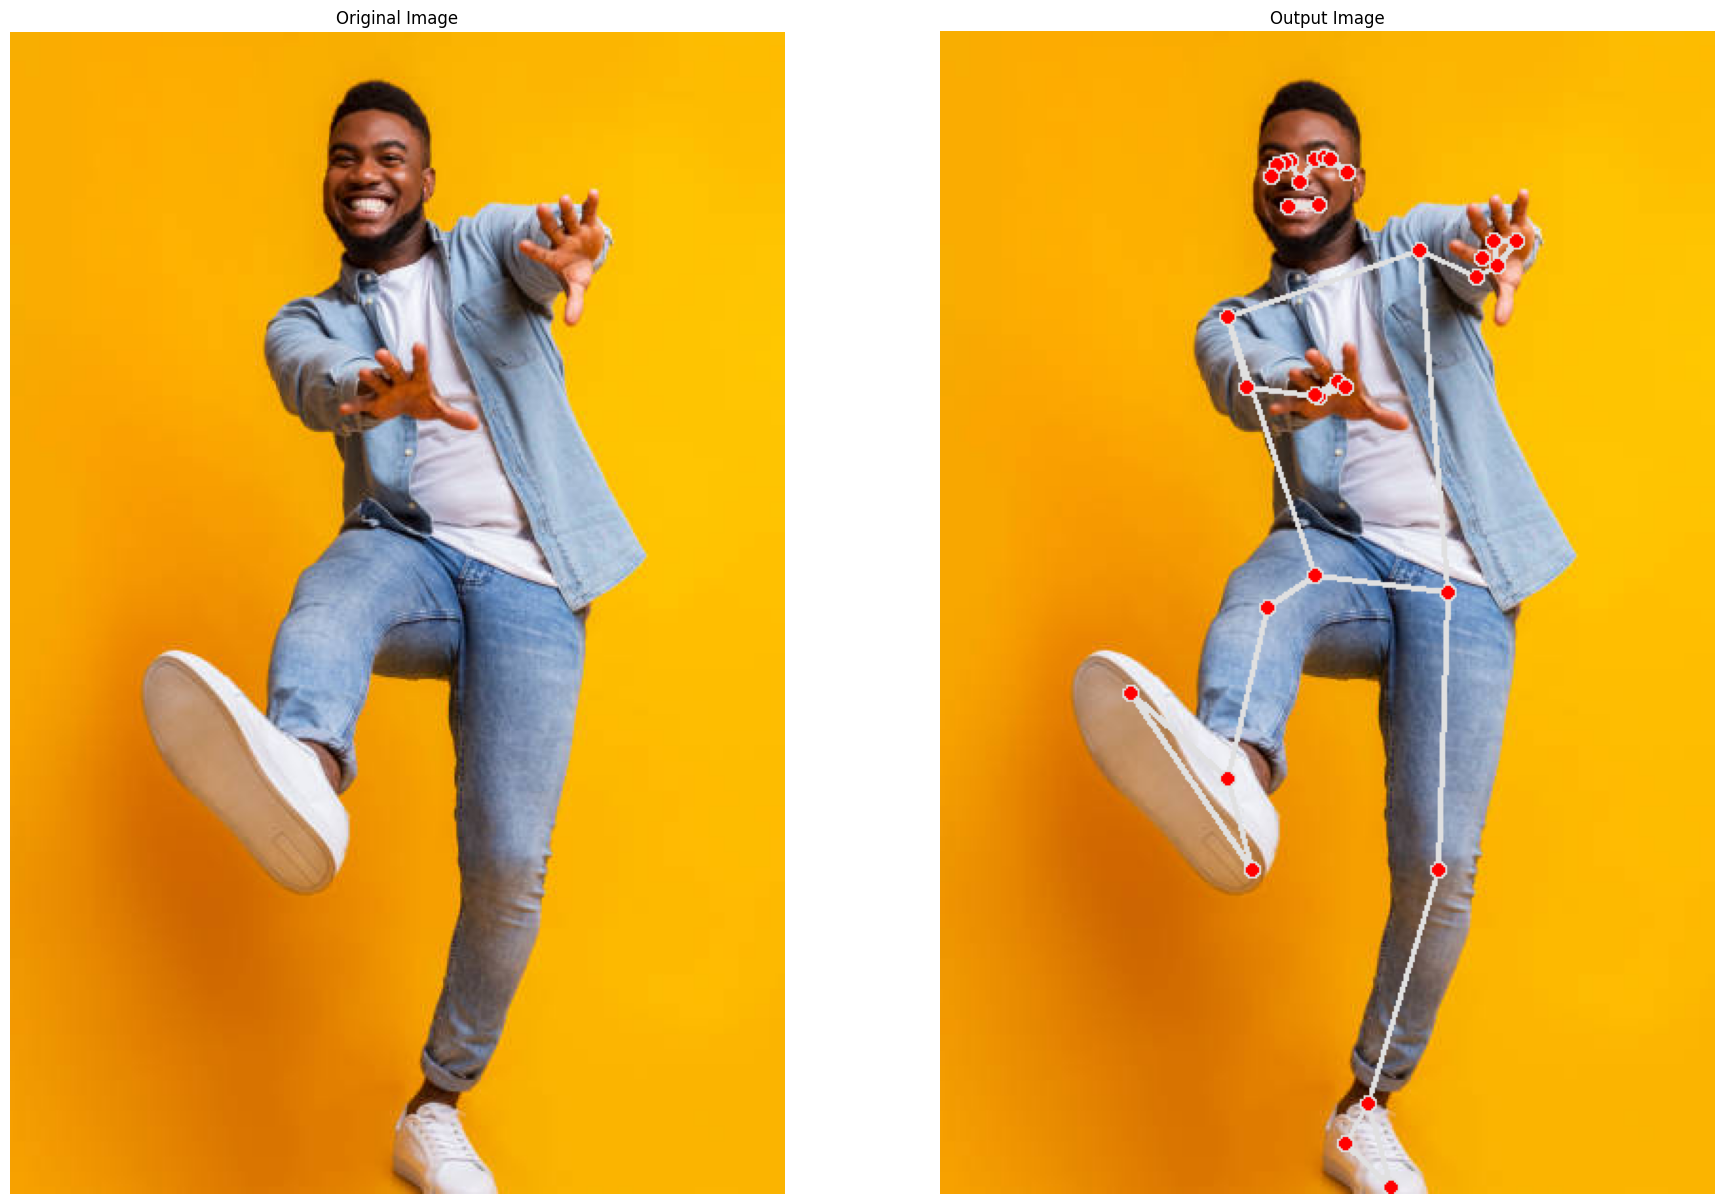

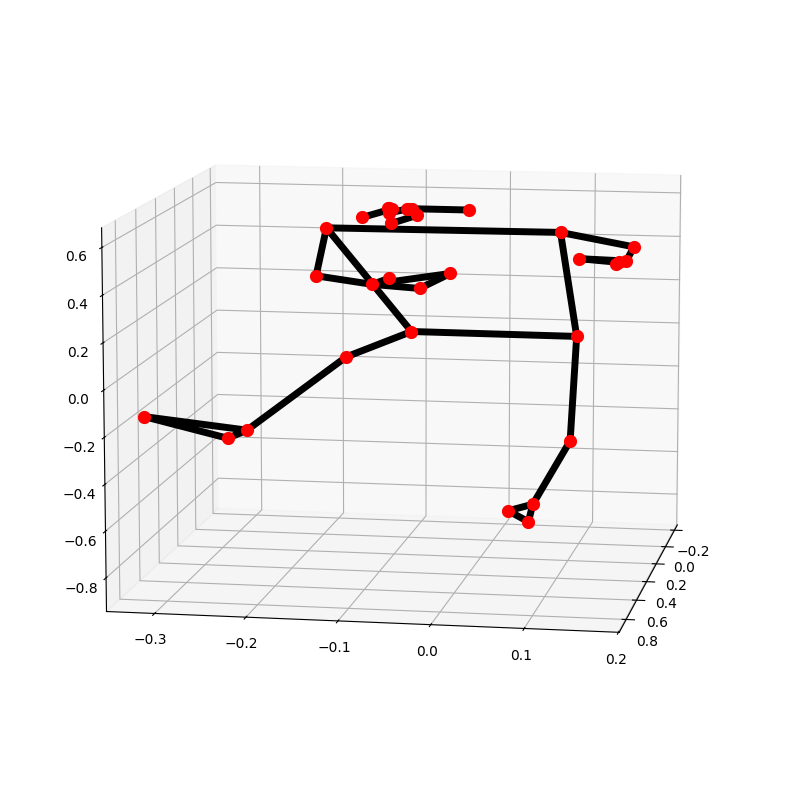

In [11]:
##Now utilize the function created above to perform pose detection on a few sample images and display the results.

## Reading another sample image and perform pose detection on it.
image = cv2.imread('sample1.jpg')
detectPose(image, pose, display=True)

In [12]:
# Install OpenCV if needed
!pip install opencv-python-headless

In [13]:
from IPython.display import HTML
from base64 import b64encode

## Define BODY_PARTS and POSE_PAIRS
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

## Specifying the paths to the uploaded files
pb_path = "graph_opt (1).pb"  # Path to the .pb file
video_path = "run1.mp4"   # Path to the video file

## Load the TensorFlow model
net = cv2.dnn.readNetFromTensorflow(pb_path)

## Function to perform pose estimation
def pose_estimation(video_path, output_path, threshold=0.2):
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    ## Define VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_width = frame.shape[1]
        frame_height = frame.shape[0]

        ## Prepare the frame for the network
        net.setInput(cv2.dnn.blobFromImage(frame, 2.0, (368, 368), (127.5, 127.5, 127.5), swapRB=True, crop=False))
        out_net = net.forward()
        out_net = out_net[:, :19, :, :]

        points = []
        for i in range(len(BODY_PARTS)):
            heat_map = out_net[0, i, :, :]
            _, conf, _, point = cv2.minMaxLoc(heat_map)
            x = int((point[0] * frame_width) / out_net.shape[3])
            y = int((point[1] * frame_height) / out_net.shape[2])
            points.append((x, y) if conf > threshold else None)

        ## Draw skeleton
        for pair in POSE_PAIRS:
            part_from = pair[0]
            part_to = pair[1]

            id_from = BODY_PARTS[part_from]
            id_to = BODY_PARTS[part_to]

            if points[id_from] and points[id_to]:
                cv2.line(frame, points[id_from], points[id_to], (0, 255, 0), 3)
                cv2.circle(frame, points[id_from], 3, (0, 0, 255), -1)
                cv2.circle(frame, points[id_to], 3, (0, 0, 255), -1)

        out.write(frame)

    cap.release()
    out.release()

## Define the output video path
output_video_path = "output_pose.mp4"

## Run Pose Estimation
pose_estimation(video_path, output_video_path)

## Display the Output Video
print("Processing complete. Displaying the output video:")
# mp4 = open(output_video_path, "rb").read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML(f"""
# <video width="640" height="480" controls>
#     <source src="{data_url}" type="video/mp4">
# </video>
# """)


Processing complete. Displaying the output video:


In [4]:
!pip install opencv-python mediapipe pyvirtualcam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 kB 2.9 MB/s eta 0:00:00


In [14]:
!pip install opencv-python mediapipe


In [ ]:
import cv2
import mediapipe as mp
import time
from IPython.display import display, Image

# Setup Pose function for video.
mp_pose = mp.solutions.pose
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Access the webcam (0 is the default webcam on your system)
video = cv2.VideoCapture(0)

# Check if webcam is opened
if not video.isOpened():
    print("Could not access webcam")
    exit()

# Create named window for resizing purposes (optional)
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

# Initialize a variable to store the time of the previous frame
time1 = 0

# Function to detect pose landmarks
def detectPose(frame, pose_video):
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose_video.process(image_rgb)

    if results.pose_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return frame

# Loop to process video frames
while True:
    ret, frame = video.read()

    if not ret:
        break

    # Flip the frame horizontally for a "selfie view"
    frame = cv2.flip(frame, 1)

    # Resize the frame to make processing faster
    frame = cv2.resize(frame, (640, 480))

    # Perform Pose Landmark detection
    frame = detectPose(frame, pose_video)

    # Calculate FPS
    time2 = time.time()
    if (time2 - time1) > 0:
        frames_per_second = 1.0 / (time2 - time1)
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    time1 = time2

    # Display the frame in OpenCV
    cv2.imshow('Pose Detection', frame)

    # Wait for the ESC key to break the loop
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  # ESC key
        break

# Release the video capture and close the window
video.release()
cv2.destroyAllWindows()